In [1]:
email = ''
password = ''
company_url = 'https://www.linkedin.com/company/snap-inc-co/'
img_name = 'snapchat.png'
entries = 100

In [2]:
!pip install selenium
!pip install wordcloud

In [3]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from time import sleep
import random

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

In [4]:
path = './chromedriver.exe'
driver = webdriver.Chrome(executable_path=path)
driver.get(url = 'https://www.linkedin.com/'); sleep(1)

In [5]:
sign_in = driver.find_element(by='link text', value='Sign in')
sign_in.click(); sleep(1)

In [6]:
def type_word(word, element):
    ''' Types words letter-by-letter while waiting
        a random amount of time after each stroke'''
    for letter in word:
        sleep(random.uniform(.1, .4))
        element.send_keys(letter)

In [7]:
email_entry = driver.find_element(by='css selector', value='#username')
password_entry = driver.find_element(by='css selector', value='#password')
        
type_word(email, email_entry)
type_word(password, password_entry)

password_entry.send_keys(Keys.RETURN); sleep(3)

In [8]:
driver.get(url=company_url)

In [9]:
text_set = set()

for i in range(entries):
    css = '.occludable-update:nth-child({}) > div > div:nth-child(3)'.format(i)
    scroll = "window.scrollTo(0, {})".format(i * 500)
    try:
        ele = driver.find_element(by='css selector', value=css)
        driver.execute_script(scroll)
        text = ele.text.replace('hashtag', '')\
                       .replace('\n', '')\
                       .replace('…see more', '')\
                       .replace('#', '')
        text_set.add(text)
        sleep(.4)
    except: pass
    
s = ' '.join(text_set)

In [10]:
stopwords = set(STOPWORDS)
my_stopwords = {'see', 'help', 'will'}
stopwords = stopwords.union(my_stopwords)

cloud = WordCloud(
    background_color='white',
    max_words=5000,
    stopwords=stopwords,
    width=800,
    height=400
)

cloud.generate(s)

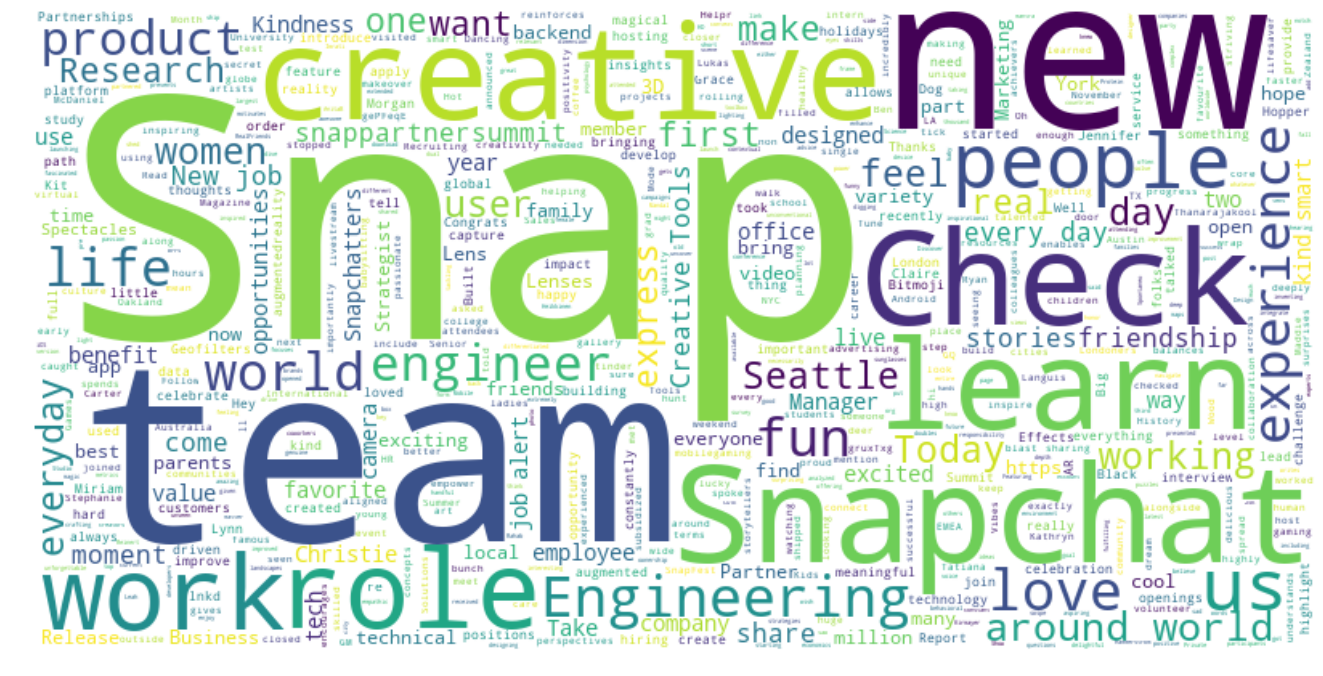

In [11]:
fig = plt.figure()
fig.set_figwidth(23) # set width
fig.set_figheight(32) # set height
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

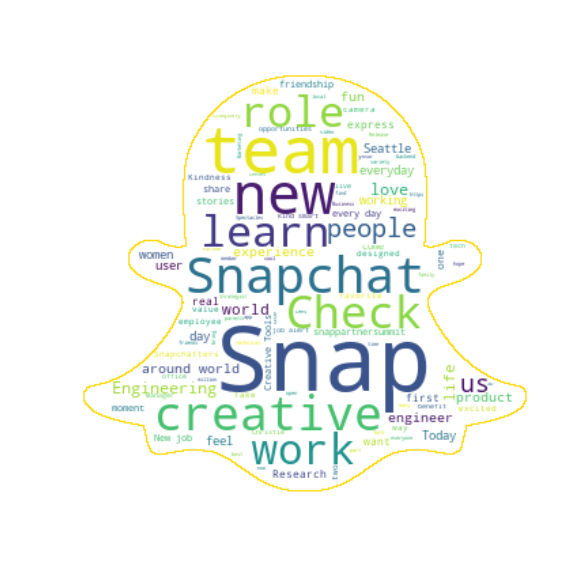

In [21]:
mask = np.array(Image.open(img_name))       
cloud = WordCloud(background_color='white',
                  max_words=5000,
                  mask=mask,
                  stopwords=stopwords,
                  contour_width=1, # contour = outline
                  contour_color='gold',
                  width=300,
                  height=300
                 )

cloud.generate(s)

fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(10) # set height

plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()